# Pulsar Star Classification
## Introduction
Pulsar stars are a kind of neutron star which are the result of a giant explosion called a supernova. Pulsars also act as a massive magnet since they have an extremely strong magnetic field compared to the Earth. Because of that strong magnetic field, charged particles are directed to align with the magnetic field. This leads to a jet of charged particles accelerating out of the pulsar. A pulsar emits impulses in 2 opposite directions. When it spins, it appears that the waves switch on and off. This is why people sometimes refer to pulsar stars as a lighthouse. The differences between pulsars and a typical neutron star are their high rotation speed and beams of electromagnetic radiation. Because of their regular rotation, pulsars periodically send impulses of radio waves or even emit a deadly gamma wave to the universe. 

Ever since the first discovery of pulsars in 1967, people have been studying them searching for more. The extreme density of pulsar stars allows extreme states of matter to be studied.  Because of the extreme density of pulsar stars, matter can behave in a manner not observed normally. That is why extreme states of matter can be studied in pulsar stars such as plasma and superfluid. The concept of “pulsar timing” - times for the impulses of radio waves to arrive from a distance is also studied. Because of its precise period, the timing for each impulse to arrive is almost the same and thus it is referred to as the most accurate natural clock in the universe. The timing could be used in much scientific research. Pulsar timing allows scientists to study gravitational theories and calculate astrometric measurements.

In this project, we seek to determine if k-nearest neighbours classification can be used to correctly classify star observations as 'pulsar' or 'non-pulsar' using the integrated profile mean and integrated profile excess kurtosis as predictor variables. We will also analyze this dataset using exploratory data analysis.
In the data set provided from the website (HTRU2 Data Set), there are no column names. From the definition provided from the website, they are “mean of the integrated profile”, “standard deviation of the integrated profile”, “excess kurtosis of the integrated profile”, “skewness of the integrated profile”, “mean of the DM-SNR curve”, “standard deviation of the DM-SNR curve”, “excess kurtosis of the DM-SNR curve”, “Skewness of the DM-SNR curve” and “target class” respectively. We will add the column names into the data set for the later analysis.

We will split 75% of our data set into the training data set and the rest of them into the testing data set. Then we will find the best number of neighbours for the K-NN algorithm from the training data set using cross-validation. The accuracy will be evaluated through the predictive model built from the training data set and fitting the predictive model into the testing dataset. We will use the mean of the integrated profile and the excess kurtosis of the integrated profile as the variables in our prediction.
## Methods & Results
For our analysis we decided to use a classification model to predict pulsar stars. Firstly, we read in the dataset using the read_csv function. Next, we wrangled the data, which consisted of removing the NA values, creating column names, and converting the class column into a factor instead of a numerical value. We then summarized the dataset using the glimpse and head functions. Next, we used the ggpairs function to show the relationships between all of the variables, and therefore decided that Integrated Profile Mean and Integrated Profile Excess Kurtosis are the best variables to use in our classification. Using these two variables we created a scatterplot with color set to the target class to show the relationship between the two variables and the class. After determining our predictor variables we split the data into testing data and training data, using 75% of the data for training and 25% for testing. Next we created a 5-fold cross-validation for the training data, using the target class as the column we will be predicting. We then created a model specification with the training data with the weight function as rectangular and setting neighbors equal to tune, as we are still trying to decide the optimal number of neighbors. We also set the engine to ‘kknn’ and the mode to ‘classification’ to ensure our analysis will run properly. Next, we create a recipe using the training data, using the two variables selected earlier, Integrated Profile Mean and Integrated Profile Kurtosis, as the predictor variables. We also scale and center the variables as the IP Mean ranges from around 0 to 200, while the IP Kurtosis ranges from around -2 to 10, and this scaling and centering ensures the variables will be valued equally in our model. We then added the recipe and model specification into a workflow, specifying the resamples to be the 5-fold cross validation created earlier and testing K-values from 1-20 using grid = 10. We then collect the metrics from our workflow and collect the accuracies of each K-value using the filter function. We use these metrics to create a line plot of K vs the accuracy of each K-value. We use this plot to determine the ideal value of K, which we chose as 10. This K-value provided optimal accuracy along with preventing underfitting that could arise from a low K-value. Next, we used the determined value of K to create a new model specification, once again setting the weight function to be rectangular, but setting neighbors = 10 this time. Once again we set the engine to be ‘kknn’ and the mode to be classification. Using this new model specification, we created another workflow using the same recipe, while fitting the training data. Finally, we used this workflow to predict the class labels for the testing data, and then combining these labels with the original testing data. We then used the metrics of the predictions along with a  confusion matrix to calculate the accuracy of our model, which is 97.9 %. The confusion matrix also allowed us to visualized the specific accuracies when predicting pulsar stars and non-pulsar stars, which were 83.1 % and 99.5% respectively. We also created another scatterplot similar to the plot from the exploratory data analysis, except with the predicted class as the color label, to prove that the predictor variables we selected were the most effective. For this plot we used the Integrated Profile Mean as the x-axis and Integrated Profile Kurtosis as the y-axis

In [1]:
#run this cell to install required packages if you don't have them
#install.packages('tidyverse')
#install.packages('tidymodels')
#install.packages('GGally')

In [2]:
#loading required packages
library(tidyverse)
library(tidymodels)
library(GGally)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.2
✔ tidyr   1.1.1     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

Warning message:
“package ‘ggplot2’ was built under R version 4.0.1”
Warning message:
“package ‘tibble’ was built under R version 4.0.2”
Warning message:
“package ‘tidyr’ was built under R version 4.0.2”
Warning message:
“package ‘dplyr’ was built under R version 4.0.2”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Warning message:
“package ‘tidymodels’ was built under R version 4.0.2”
── Attaching packages ────────────────────────────────────── tidymodels 0.1.1 ──

✔ broom     0.7.0      ✔ recipes   0.1.13
✔ dials     0.0.8      ✔ rsample   0.0.7 
✔ infer     0.5.3      ✔ tune      0.1.1 
✔ modeldata 0.0.2      ✔ workflows 0.1.3 
✔ parsnip   0.1.3    

In [22]:
#Loading data from web and wrangling data
pulsar_withNA <- read_csv("https://raw.githubusercontent.com/Ivanxxx123/pulsar/main/HTRU_2.csv")
pulsar_dbl <- na.omit(pulsar_withNA)
colnames(pulsar_dbl) <- c("ip_mean", "ip_sd", "ip_kurtosis", "ip_skew", "dmsnr_mean", "dmsnr_sd", "dmsnr_kurtosis", "dmsnr_skew", "class")
pulsar <- pulsar_dbl %>%
   mutate(class = as_factor(class))
glimpse(pulsar)
glimpse(pulsar_withNA)

Parsed with column specification:
cols(
  `140.5625` = col_double(),
  `55.68378214` = col_double(),
  `-0.234571412` = col_double(),
  `-0.699648398` = col_double(),
  `3.199832776` = col_double(),
  `19.11042633` = col_double(),
  `7.975531794` = col_double(),
  `74.24222492` = col_double(),
  `0` = col_double()
)



Rows: 17,897
Columns: 9
$ ip_mean        <dbl> 102.50781, 103.01562, 136.75000, 88.72656, 93.57031, 1…
$ ip_sd          <dbl> 58.88243, 39.34165, 57.17845, 40.67223, 46.69811, 48.7…
$ ip_kurtosis    <dbl> 0.46531815, 0.32332837, -0.06841464, 0.60086608, 0.531…
$ ip_skew        <dbl> -0.51508791, 1.05116443, -0.63623837, 1.12349169, 0.41…
$ dmsnr_mean     <dbl> 1.6772575, 3.1212375, 3.6429766, 1.1789298, 1.6362876,…
$ dmsnr_sd       <dbl> 14.860146, 21.744669, 20.959280, 11.468720, 14.545074,…
$ dmsnr_kurtosis <dbl> 10.576487, 7.735822, 6.896499, 14.269573, 10.621748, 1…
$ dmsnr_skew     <dbl> 127.39358, 63.17191, 53.59366, 252.56731, 131.39400, 4…
$ class          <fct> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …
Rows: 17,897
Columns: 9
$ `140.5625`     <dbl> 102.50781, 103.01562, 136.75000, 88.72656, 93.57031, 1…
$ `55.68378214`  <dbl> 58.88243, 39.34165, 57.17845, 40.67223, 46.69811, 48.7…
$ `-0.234571412` <dbl> 0.46531815, 0.32332837, -0.06841464, 0.60086608, 0.531…
$ `-

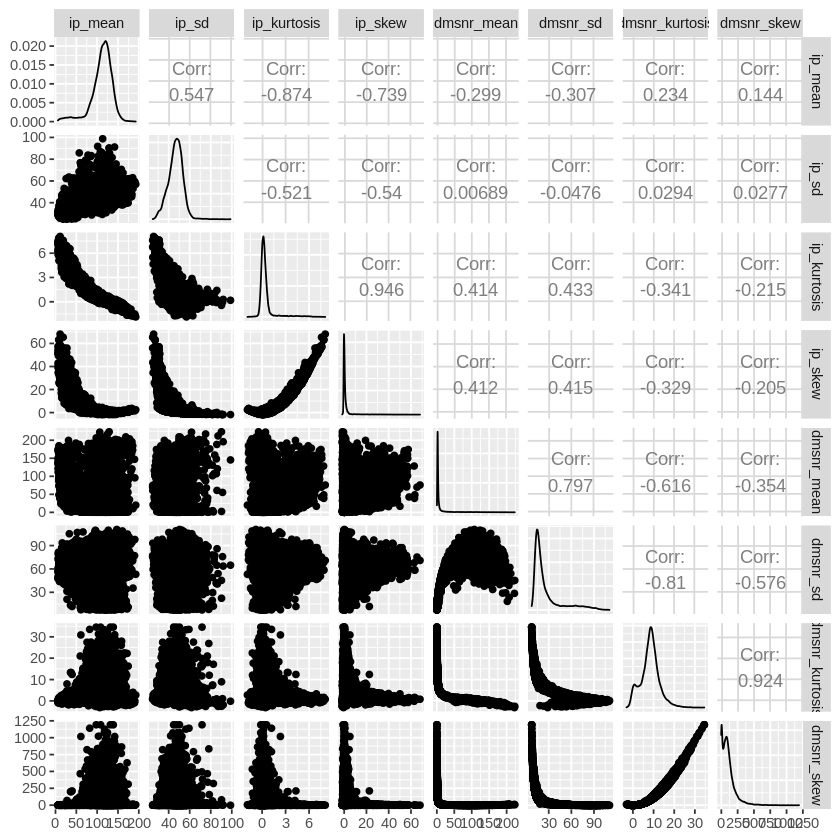

In [26]:
#visualizing all continuous variables
pulsar_eda <- pulsar %>% 
    select(-class) %>% 
    ggpairs()
pulsar_eda

Figure 1: Scatterplot of All Dataset Variables

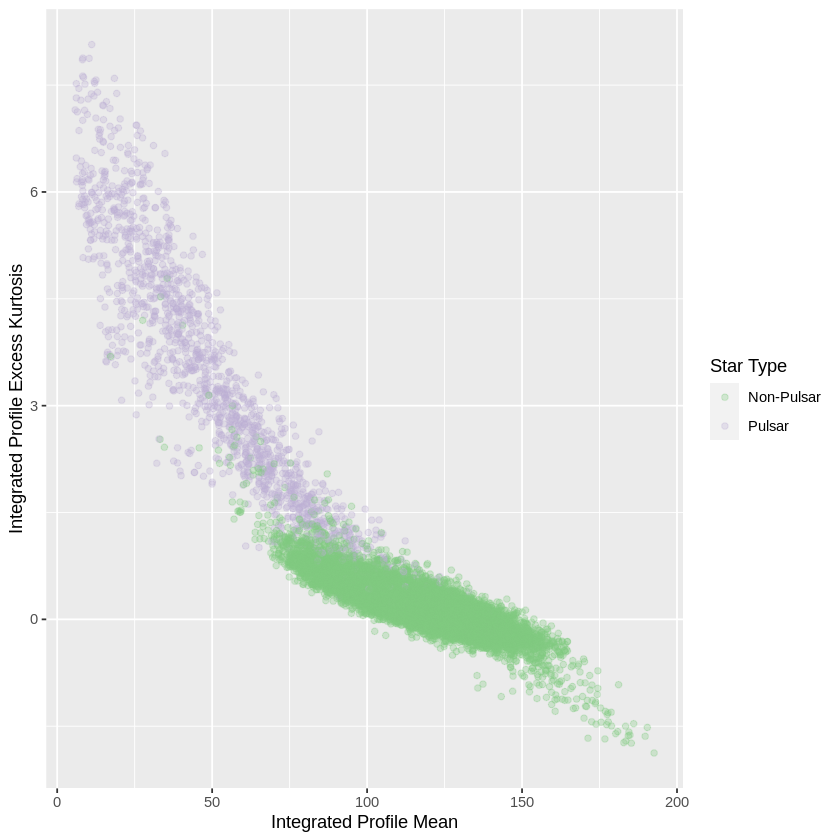

In [25]:
#generating exploratory data analysis plot
eda_plot <- pulsar %>% 
    ggplot(aes(x = ip_mean, y = ip_kurtosis, colour = class)) +
    geom_point(alpha = 0.3) +
    xlab("Integrated Profile Mean") +
    ylab("Integrated Profile Excess Kurtosis") +
    scale_color_brewer(palette = 'Accent', name = 'Star Type', labels = c('Non-Pulsar', 'Pulsar'))
eda_plot

Figure 2: Integrate Profile Mean vs. Integrated Profile Kurtosis by Star Type

In [24]:
#generating summary table
eda_table <- tibble('Pulsar Observations' = 1639, 'Non-Pulsar Observations' = 16259, 
                    'Observations With Missing Data' = sum(is.na(pulsar_withNA)),
                    'Mean Integrated Profile Mean' = mean(pulsar$ip_mean), 
                    'Mean Integrated Profile Kurtosis' = mean(pulsar$ip_kurtosis))
eda_table

Pulsar Observations,Non-Pulsar Observations,Observations With Missing Data,Mean Integrated Profile Mean,Mean Integrated Profile Kurtosis
<dbl>,<dbl>,<int>,<dbl>,<dbl>
1639,16259,0,111.0783,0.4778971


Figure 3: Exploratory Data Summary Table

In [7]:
#splitting data into training data set and testing data set
set.seed(2020)
pulsar_split <- initial_split(pulsar, prop = 0.75, strata = class)
pulsar_training <- training(pulsar_split)
pulsar_testing <- testing(pulsar_split)

In [8]:
#Previewing the separated data sets
glimpse(pulsar_training)
glimpse(pulsar_testing)

Rows: 13,423
Columns: 9
$ ip_mean        <dbl> 102.50781, 103.01562, 136.75000, 93.57031, 130.38281, …
$ ip_sd          <dbl> 58.88243, 39.34165, 57.17845, 46.69811, 39.84406, 52.6…
$ ip_kurtosis    <dbl> 0.46531815, 0.32332837, -0.06841464, 0.53190485, -0.15…
$ ip_skew        <dbl> -0.51508791, 1.05116443, -0.63623837, 0.41672112, 0.38…
$ dmsnr_mean     <dbl> 1.6772575, 3.1212375, 3.6429766, 1.6362876, 1.2207358,…
$ dmsnr_sd       <dbl> 14.860146, 21.744669, 20.959280, 14.545074, 14.378941,…
$ dmsnr_kurtosis <dbl> 10.576487, 7.735822, 6.896499, 10.621748, 13.539456, 9…
$ dmsnr_skew     <dbl> 127.39358, 63.17191, 53.59366, 131.39400, 198.23646, 1…
$ class          <fct> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, …
Rows: 4,474
Columns: 9
$ ip_mean        <dbl> 88.72656, 119.48438, 134.96094, 117.94531, 114.36719, …
$ ip_sd          <dbl> 40.67223, 48.76506, 49.55433, 45.50658, 51.94572, 51.6…
$ ip_kurtosis    <dbl> 0.600866079, 0.031460220, -0.135303833, 0.325437564, -…
$ ip_

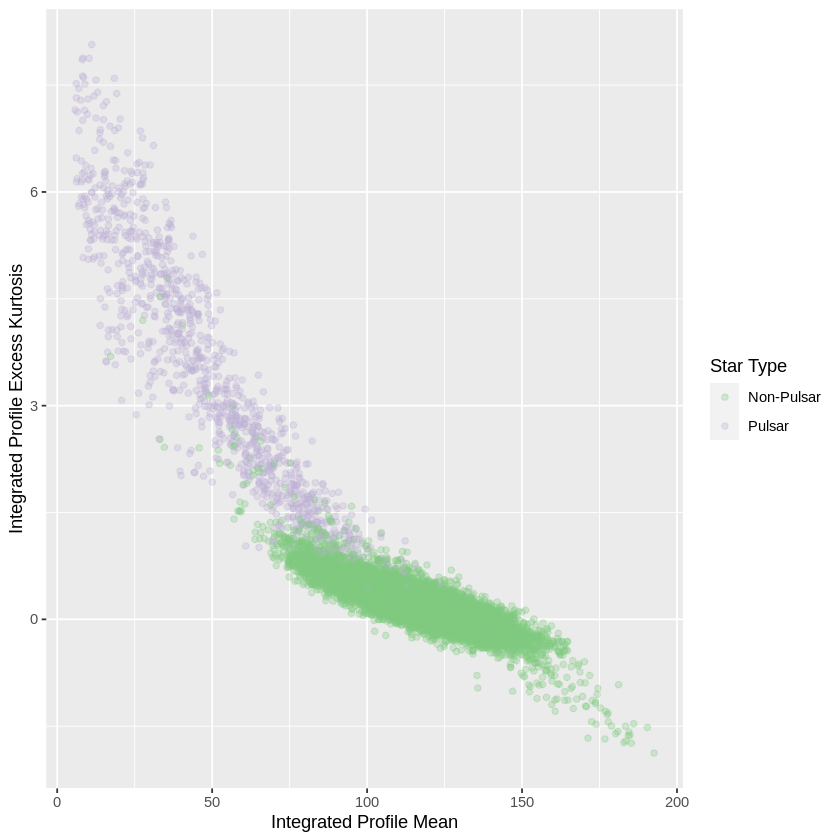

In [9]:
#Visualising the training data set
training_plot <- ggplot(pulsar_training, aes(x = ip_mean, y = ip_kurtosis, color = class)) +
   geom_point(alpha = 0.3) +
   labs(x = 'Integrated Profile Mean', y = 'Integrated Profile Excess Kurtosis') +
   scale_color_brewer(palette = 'Accent', name = 'Star Type', labels = c('Non-Pulsar', 'Pulsar'))
training_plot

Figure 4: Integrated Profile Mean vs Integrated Profile Kurtosis by 
Star Type for Training Dataset

In [10]:
#Splitting training data set into 5 pieces
set.seed(2020)
pulsar_vfold <- vfold_cv(pulsar_training, v = 5, strata = class)

In [11]:
#Procedure to find the best K step 1: Creating the model specification
knn_tune <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) %>%
   set_engine("kknn") %>%
   set_mode("classification")
knn_tune

K-Nearest Neighbor Model Specification (classification)

Main Arguments:
  neighbors = tune()
  weight_func = rectangular

Computational engine: kknn 


In [12]:
#Step 2: Creating the recipe
pulsar_recipe <- recipe(class ~ ip_mean + ip_kurtosis,  data = pulsar_training) %>%
   step_scale(all_predictors()) %>%
   step_center(all_predictors())
pulsar_recipe

Data Recipe

Inputs:

      role #variables
   outcome          1
 predictor          2

Operations:

Scaling for all_predictors()
Centering for all_predictors()

In [13]:
#Step 3: Put the model specification and the recipe into a workflow
set.seed(2020)
knn_results <- workflow() %>% 
   add_recipe(pulsar_recipe) %>% 
   add_model(knn_tune) %>% 
   tune_grid(resamples = pulsar_vfold, grid = 10) %>%
   collect_metrics %>%
   filter(.metric == "accuracy")
knn_results

neighbors,.metric,.estimator,mean,n,std_err,.config
<int>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
2,accuracy,binary,0.9637936,5,0.001500913,Model1
3,accuracy,binary,0.9764585,5,0.001349515,Model2
5,accuracy,binary,0.9781720,5,0.001138590,Model3
6,accuracy,binary,0.9781720,5,0.001138590,Model4
7,accuracy,binary,0.9782465,5,0.001616852,Model5
8,accuracy,binary,0.9782465,5,0.001616852,Model6
10,accuracy,binary,0.9792150,5,0.001679080,Model7
11,accuracy,binary,0.9792150,5,0.001654111,Model8
14,accuracy,binary,0.9790660,5,0.001568134,Model9


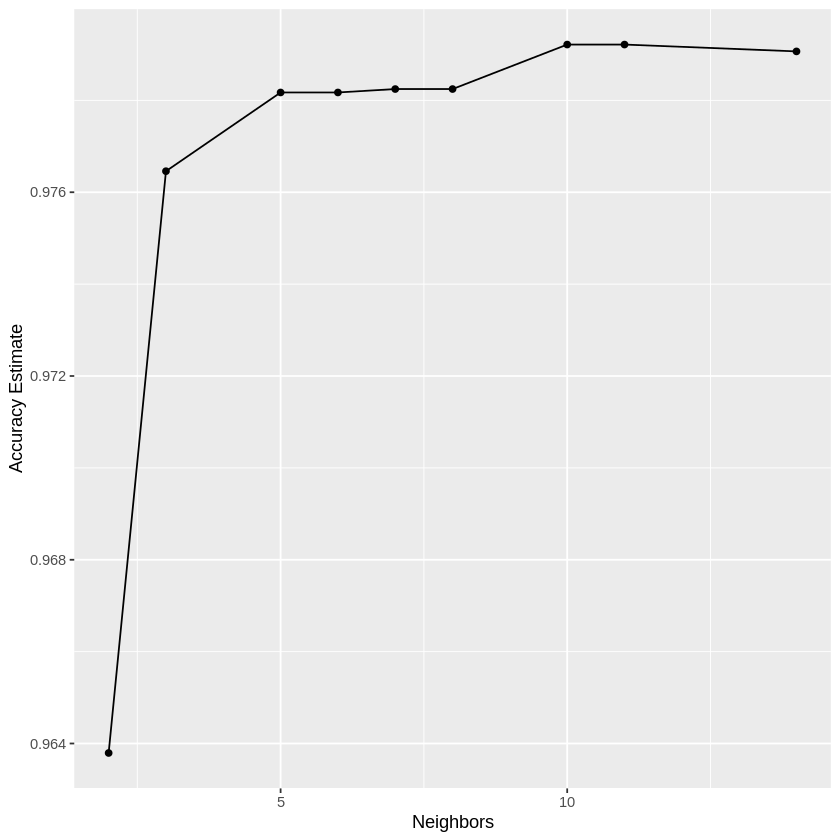

In [14]:
#Step 4: Creating a plot to see the relationship between number of neighbors and accuracy
accuracy_vs_k <- ggplot(knn_results, aes(x = neighbors, y = mean)) +
  geom_point() +
  geom_line() +
  labs(x = 'Neighbors', y = 'Accuracy Estimate')
accuracy_vs_k

Figure 5: Classifier Accuracy by Number of Neighbours on Training 
Dataset

In [15]:
#Step 5: Finding the best K
best_k <- knn_results %>%
   arrange(desc(mean)) %>%
   head(n = 1) %>%
   pull(neighbors)
best_k

[1] 10

In [16]:
#Using the best K to create another model specification
knn_spec_best_k <- nearest_neighbor(weight_func = "rectangular", neighbors = best_k) %>%
   set_engine("kknn") %>%
   set_mode("classification")

In [17]:
#Put the model specification and the recipe into a workflow
knn_fit <- workflow() %>% 
   add_recipe(pulsar_recipe) %>% 
   add_model(knn_spec_best_k) %>%
   fit(data = pulsar_training)
knn_fit

══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
2 Recipe Steps

● step_scale()
● step_center()

── Model ───────────────────────────────────────────────────────────────────────

Call:
kknn::train.kknn(formula = ..y ~ ., data = data, ks = ~best_k,     kernel = ~"rectangular")

Type of response variable: nominal
Minimal misclassification: 0.02085972
Best kernel: rectangular
Best k: 10

In [27]:
#Use the prediction model to predict the class of the testing data set
class_test <- predict(knn_fit, pulsar_testing) %>%
   bind_cols(pulsar_testing)
head(class_test)

.pred_class,ip_mean,ip_sd,ip_kurtosis,ip_skew,dmsnr_mean,dmsnr_sd,dmsnr_kurtosis,dmsnr_skew,class
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
0,88.72656,40.67223,0.60086608,1.1234917,1.1789298,11.468720,14.269573,252.56731,0
0,119.48438,48.76506,0.03146022,-0.1121676,0.9991639,9.279612,19.206230,479.75657,0
0,134.96094,49.55433,-0.13530383,-0.0804696,10.6964883,41.342044,3.893934,14.13121,0
0,117.94531,45.50658,0.32543756,0.6614595,2.8361204,23.118350,8.943212,82.47559,0
0,114.36719,51.94572,-0.09449890,-0.2879841,2.7382943,17.191891,9.050612,96.61190,0
0,136.09375,51.69100,-0.04590893,-0.2718164,9.3428094,38.096400,4.345438,18.67365,0


In [19]:
#Compute accuracy
class_test_predictions <- class_test %>% 
    metrics(truth = class, estimate = .pred_class)
class_test_predictions

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.9785427
kap,binary,0.8739322


In [20]:
#Ensuring accuracy is correct using a confusion matrix 
training_results <- class_test %>%
   conf_mat(truth = class, estimate = .pred_class)
training_results

          Truth
Prediction    0    1
         0 4006   76
         1   20  372

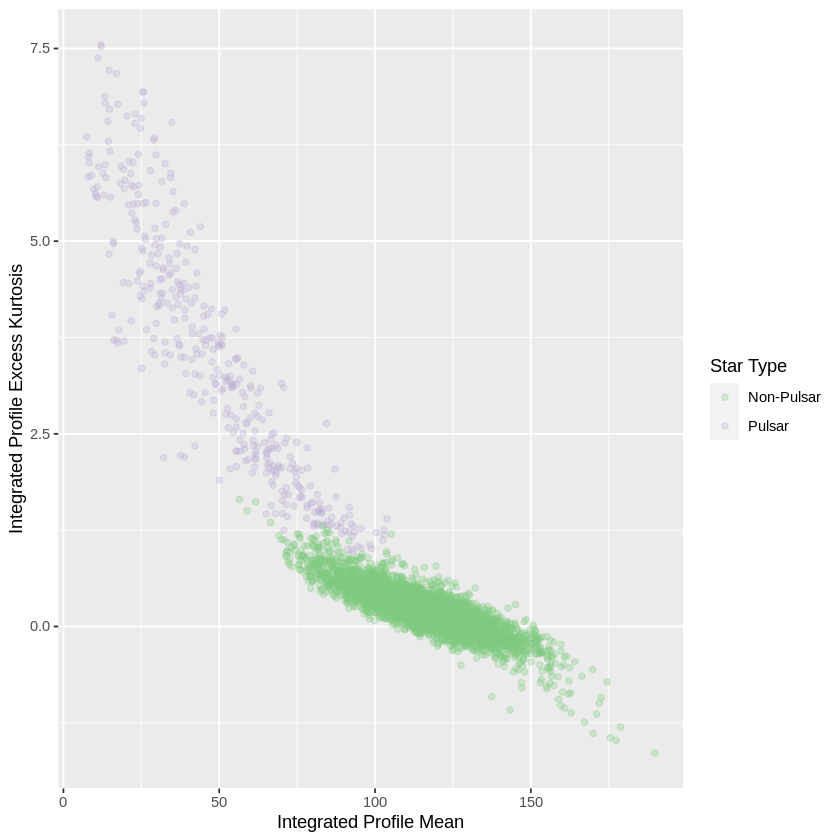

In [21]:
#Final visualization
predictions_plot <- ggplot(class_test, aes(x = ip_mean, y = ip_kurtosis, color = .pred_class)) +
   geom_point(alpha = 0.3) +
   labs(x = 'Integrated Profile Mean', y = 'Integrated Profile Excess Kurtosis') +
   scale_color_brewer(palette = 'Accent', name = 'Star Type', labels = c('Non-Pulsar', 'Pulsar'))
predictions_plot

Figure 6: Integrated Profile Mean vs. Integrated Profile Kurtosis by Predicted Star Type for Testing Dataset 

## Discussion
Our classification model was able to classify pulsar star observations with high accuracy. By splitting our training data up into 5 sets and using cross-validation, we found that our classifier is most accurate when 10 neighbours are used. Visualizing the results from the cross-validation showed that training accuracy reached a maximum at 10 neighbours. When the final optimized version of our classifier was run on the testing data, we found that it was able to classify pulsar stars with an accuracy of 97.9%. This result far exceeded our expectations regarding how accurately a k-nearest neighbours classifier could find pulsar stars. However, digging deeper into the accuracy of our classifier using a confusion matrix reveals that our classifier was only able to correctly classify pulsar stars (excluding true non-pulsar stars) for 372 out of 448 true pulsar observations, or 83.1%. On the other hand, the classifier was able to correctly classify non-pulsar stars (excluding true pulsar stars) for 4006 out of 4026 true non-pulsar observations, or 99.5%. This shows that our classifier is much better at correctly classifying non-pulsar stars compared to pulsar stars. Therefore, astronomers could potentially miss many pulsar stars by using this classification model. Since astronomical research focuses on finding new pulsar stars, the accuracy for correctly identifying true pulsar stars must be improved. 

Our exploratory data analysis suggested that our classifier would succeed since plotting observations as a scatterplot based on integrated profile mean and kurtosis revealed that pulsar and non-pulsar observations were well separated. We tried plotting every combination of variables found in the data and decided that the integrated profile mean and kurtosis resulted in the best separation. To improve this model further, a future project could test if using more than two predictor variables could increase the model’s accuracy and correctly classify more true pulsar stars. Another way to increase the accuracy for true pulsar stars could be to tune the number of neighbours not just based on total accuracy, but rather on true pulsar accuracy. It’s possible that while one value of K may not maximize total accuracy, it results in more true pulsar stars being correctly identified. Since there are far less true pulsar stars compared to true non-pulsar stars, it would be far easier to root out misclassified true non-pulsar stars compared to the inverse. Therefore, we want to optimize true pulsar accuracy over true non-pulsar accuracy while doing so in a way that doesn’t misclassify too many true non-pulsars and render the classification unusable.

Using a classifier to find pulsar stars could have an impact on the way astronomers study pulsars. The dataset we used to make our classifier contained 17,898 observations - which would be extremely time-consuming to analyze manually. This is where k-nearest neighbours classification can be incredibly useful. Giving the algorithm examples of what variable values pulsar and non-pulsar stars tend to have lets it predict the star type of new observations using a majority vote of nearby already-known training observations. Since computer algorithms can process large amounts of data far faster than a human could manually, a properly trained classifier is the perfect method to process these datasets which contain thousands of observations. However, our results emphasized that one of the downsides of using computer algorithms is that they might not be as thorough or as accurate as a human performing the analysis manually. Therefore, classification algorithms may be better suited to identifying the vast majority of the observations, where variables are clearly within the bounds of one star type and the neighbour composition exceeds a majority. Then, human data analysts could manually analyze the cases where new observations are on the cusp of each star type and provide a more thorough analysis. This would reduce the workload of human workers and could potentially improve accuracy as the human analyzers would be able to go through each observation more thoroughly with less total observations to process.

Our project shows that classification using k-nearest neighbours could be a powerful way to sift through datasets containing thousands of observations. However, concerns about misclassified true pulsar stars suggest that k-nearest neighbours classification might not be the best way to find new pulsar stars. When performing exploratory data analysis, we noticed that there was a point where pulsar and non-pulsar observations had similar integrated profile mean and kurtosis values - a point of overlap. K-nearest neighbours excels when there is a clear distinction between each class, but in this murky area it may not be the best algorithm to classify observations. A further study could look at what other classification algorithms are better suited to correctly classifying data in areas where the difference between a pulsar and a non-pulsar is not well defined. The optimal approach may involve more than one classifier working together to provide the highest accuracy. Since k-nearest neighbours is a relatively simple algorithm that excels at classifying data that is clearly defined, it could handle the majority of the observations. This would leave the remainder in the zone where the attributes of a pulsar star and a non-pulsar star are similar to be handled by a more advanced algorithm. Splitting up the work in this way could prove more efficient than either classifier working alone. In this way, efficiency could be maximized without sacrificing accuracy.
## References
##### Cain, Fraser. “What Is a Pulsar?” Universe Today, 16 Mar. 2017, www.universetoday.com/25376/pulsars/.
##### Lounge, Co-learning. “Predicting Pulsar Star.” Kaggle, 26 Aug. 2020, www.kaggle.com/colearninglounge/predicting-pulsar-starintermediate.
##### “Detecting Dead Stars in Deep Space.” Hakkeray, 2 Feb. 2020, www.hakkeray.com/datascience/2020/02/02/pulsar-classification-algorithms.html. 